

---



---

# Decision Trees

---



---
Decision Trees are supervised learning algorithms that partition the feature space into regions based on feature values. They can perform both classification and regression tasks by recursively splitting the data until reaching a stopping criterion. Despite being easy to interpret and handle various data types, they are prone to overfitting. To mitigate this, ensemble methods like Random Forests and Gradient Boosting Machines are commonly used.

# Training and Visualizing a Decision Tree

The code here loads the Iris dataset, extracts the petal length and width features, initializes a DecisionTreeClassifier with a maximum depth of 2, and then trains the classifier on the dataset.

`DecisionTreeClassifier(max_depth=2)` is a configuration of the Decision Tree Classifier in scikit-learn, where `max_depth=2` limits the tree to two levels of decision nodes. This constraint makes the model simpler and faster to compute, preventing overfitting by not allowing the tree to grow too complex. It's particularly useful for understanding basic decision-making processes, as the limited depth results in a model that is easy to visualize and interpret.

For further details on configuring and utilizing the `DecisionTreeClassifier` with a `max_depth` parameter, see the [DecisionTreeClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).


In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris = load_iris()

# Extract petal length and width features from the dataset
X = iris.data[:, 2:]  # petal length and width

# Extract target variable (class labels)
y = iris.target

# Initialize a DecisionTreeClassifier with a maximum depth of 2 and random state for reproducibility
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the DecisionTreeClassifier on the dataset
tree_clf.fit(X, y)


DecisionTreeClassifier(max_depth=2, random_state=42)

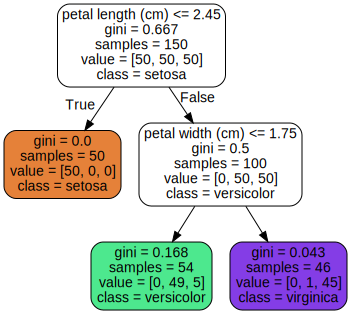

In [3]:
# Import necessary libraries
from graphviz import Source
from sklearn.tree import export_graphviz
import os
IMAGES_PATH = '/content/sample_data'

# Export the trained Decision Tree classifier as a .dot file
export_graphviz(
    tree_clf,
    out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),  # Output file path
    feature_names=iris.feature_names[2:],  # Feature names (petal length and width)
    class_names=iris.target_names,  # Class names (species)
    rounded=True,  # Rounded corners in the decision nodes
    filled=True  # Fill the decision nodes with colors representing classes
)

# Visualize the Decision Tree using Graphviz
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))


## Making Predictions

This code visualizes the decision boundaries of a trained Decision Tree classifier. It defines a function `plot_decision_boundary()` to plot the decision boundaries, and then it plots the decision boundaries along with depth annotations.

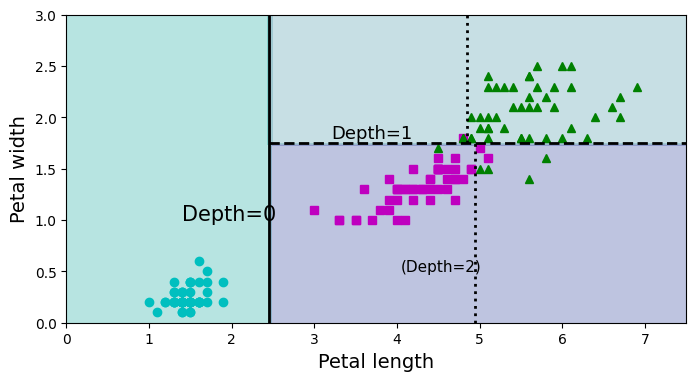

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Function to plot decision boundaries of a classifier
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    # Generate a meshgrid of points to predict
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]

    # Predict the class labels for the meshgrid points
    y_pred = clf.predict(X_new).reshape(x1.shape)

    # Define custom colormap for decision regions
    custom_cmap = ListedColormap(["#12a79d", "#293d9b", "#4898a8"])

    # Plot filled contour plot of decision regions
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

    # Plot contour lines separating decision regions
    if not iris:
        custom_cmap2 = ListedColormap(["#12a79d", "#293d9b", "#4898a8"])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)

    # Plot the training data points
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "co", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ms", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)

    # Set x and y labels depending on whether it's an Iris dataset or not
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

    # Add legend if specified
    if legend:
        plt.legend(loc="lower right", fontsize=14)

# Plot the decision boundaries of the trained Decision Tree classifier
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)

# Add decision boundary lines and depth annotations
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

# Display the plot
plt.show()


# Estimating Class Probabilities

Here we use the trained Decision Tree classifier (`tree_clf`) to predict the probability estimates for a new sample with features `[5, 1.5]`. It uses the `predict_proba()` method to output the predicted probabilities of each class label for the given sample.

In [5]:
# Use the trained Decision Tree classifier to predict the probability estimates for a new sample
tree_clf.predict_proba([[5, 1.5]])


array([[0.        , 0.90740741, 0.09259259]])

But Here we employs the trained Decision Tree classifier (`tree_clf`) to predict the class label for a new sample with features `[5, 1.5]`. It uses the `predict()` method to output the predicted class label for the given sample.

In [6]:
# Use the trained Decision Tree classifier to predict the class label for a new sample
tree_clf.predict([[5, 1.5]])


array([1])

## Regularization Hyperparameters

This code creates a new `DecisionTreeClassifier` named `tree_clf_tweaked` with adjusted parameters (`max_depth=2` and `random_state=40`). It then fits this new classifier to the dataset (`X`, `y`) using the `fit()` method.

In [7]:
# Create a new DecisionTreeClassifier with tweaked parameters
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)

# Fit the new DecisionTreeClassifier to the dataset
tree_clf_tweaked.fit(X, y)


DecisionTreeClassifier(max_depth=2, random_state=40)

This code segment sets the size of the figure and plots the decision boundaries of the tweaked Decision Tree classifier (`tree_clf_tweaked`) using the `plot_decision_boundary()` function. Additionally, it adds horizontal lines indicating decision boundaries and annotations indicating depth. Finally, it displays the plot.

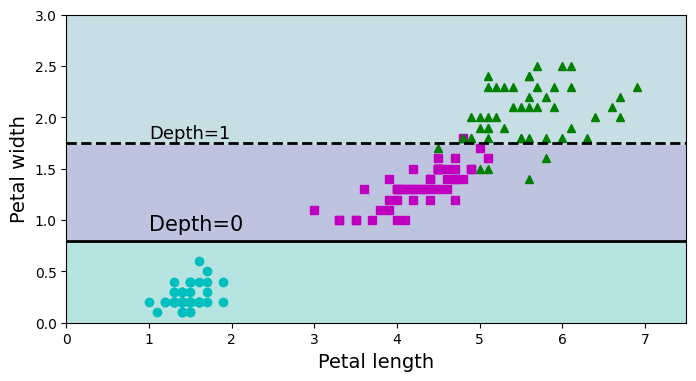

In [8]:
# Set the size of the figure
plt.figure(figsize=(8, 4))

# Plot the decision boundaries of the tweaked Decision Tree classifier
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)

# Add horizontal lines indicating decision boundaries
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)  # Decision boundary at y=0.8
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)  # Decision boundary at y=1.75

# Add annotations indicating depth
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

# Display the plot

plt.show()


This code segment generates moon-shaped synthetic data using the `make_moons` function from `sklearn.datasets`. It initializes two Decision Tree classifiers (`deep_tree_clf1` and `deep_tree_clf2`) with different parameters and fits them to the synthetic data. Then, it creates a figure with two subplots for visualizing decision boundaries of both classifiers. Finally, it plots decision boundaries for each classifier and displays the plot.

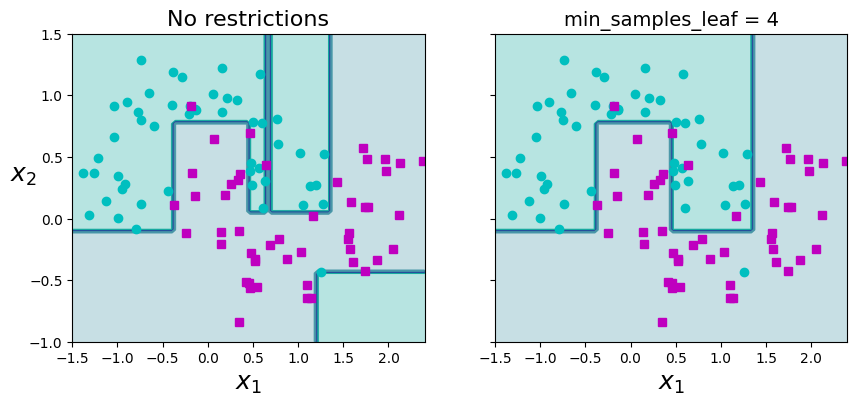

In [9]:
# Import necessary libraries
from sklearn.datasets import make_moons

# Generate moon-shaped synthetic data
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

# Initialize two Decision Tree classifiers with different parameters
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

# Fit both classifiers to the synthetic data
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

# Create a figure with two subplots for visualizing decision boundaries
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# Plot decision boundaries for the first classifier
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)

# Plot decision boundaries for the second classifier
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

# Display the plot

plt.show()


This code segment defines a rotation angle (`angle`) and creates a rotation matrix based on this angle. It then rotates the moon-shaped dataset (`X`) using the rotation matrix. Next, it initializes a Decision Tree classifier (`tree_clf_r`) and fits the classifier to the rotated dataset. Finally, it creates a figure to plot the decision boundaries of the classifier trained on the rotated dataset using the `plot_decision_boundary()` function and displays the plot.

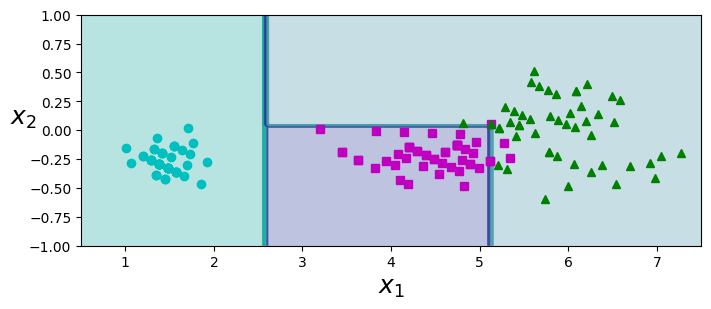

In [11]:
# Define the rotation angle
angle = np.pi / 180 * 20

# Define the rotation matrix using the angle
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])

# Rotate the moon-shaped dataset using the rotation matrix
Xr = X.dot(rotation_matrix)

# Initialize a Decision Tree classifier
tree_clf_r = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the rotated dataset
tree_clf_r.fit(Xr, y)

# Create a figure to plot the decision boundaries
plt.figure(figsize=(8, 3))

# Plot decision boundaries for the classifier trained on the rotated dataset
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

# Show the plot
plt.show()


Here also we segment generates a synthetic dataset and rotates it. Then, it trains two Decision Tree classifiers, one on the original dataset and the other on the rotated dataset. Finally, it plots decision boundaries for both classifiers to visualize their performance.

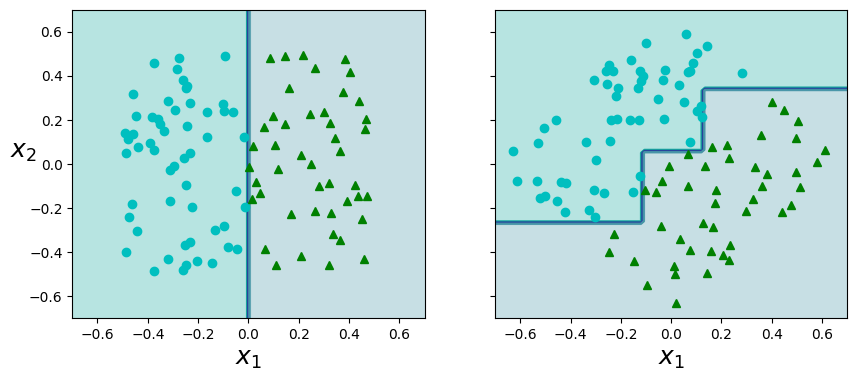

In [12]:
# Set random seed for reproducibility
np.random.seed(6)

# Generate a synthetic dataset
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

# Define rotation angle
angle = np.pi / 4

# Define rotation matrix
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])

# Rotate the dataset
Xsr = Xs.dot(rotation_matrix)

# Initialize Decision Tree classifiers and fit them to the datasets
tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)

tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

# Create a figure with two subplots for visualizing decision boundaries
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# Plot decision boundaries for the classifier trained on the original dataset
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

# Plot decision boundaries for the classifier trained on the rotated dataset
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

# Fisplay the plot
plt.show()
